In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [4]:
SD=pd.read_csv("Salary_Data.csv")

In [5]:
SD.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Understanding

In [6]:
SD.shape

(30, 2)

In [7]:
SD.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
SD.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
SD.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [10]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# EDA and Visualization

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

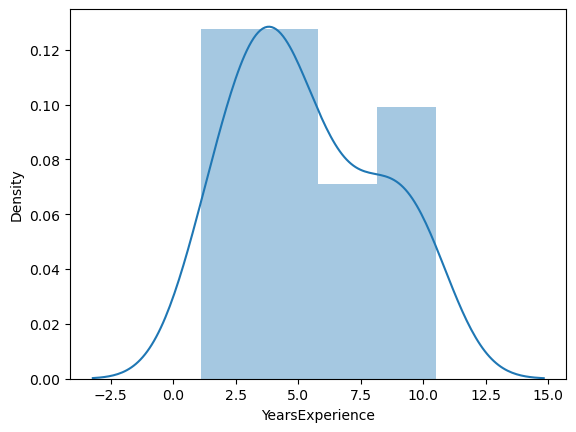

In [14]:
sns.distplot(SD['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

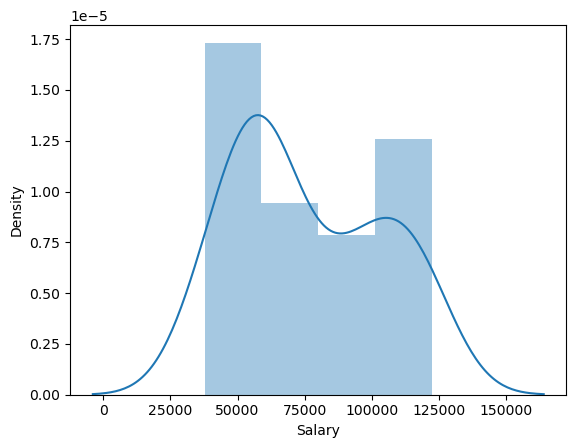

In [15]:
sns.distplot(SD['Salary'])

# Assumption Check

# Normality

[]

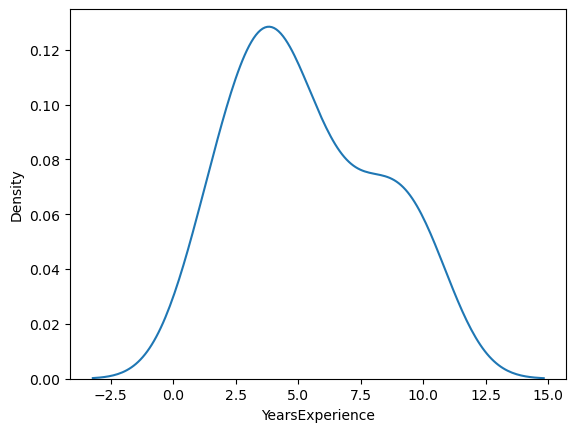

In [17]:
sns.distplot(a=SD['YearsExperience'],hist=False)
plt.plot()

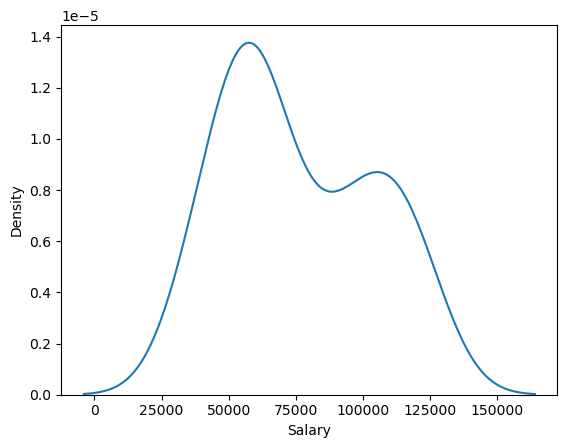

In [32]:
sns.distplot(a=SD['Salary'],hist=False)
plt.show()

# Linearity

[]

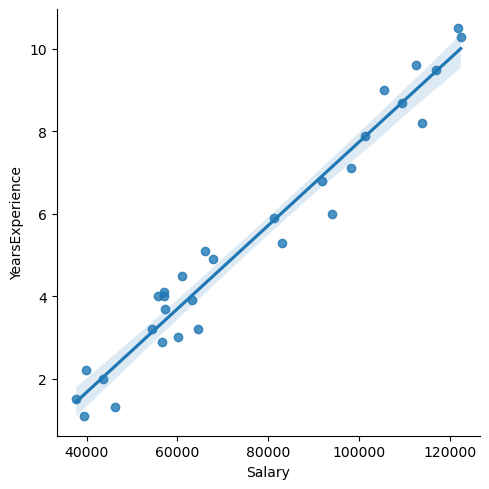

In [36]:
sns.lmplot(x='Salary',y='YearsExperience',data=SD)
plt.plot()

In [37]:
SD.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

# Creating model using statsmodel

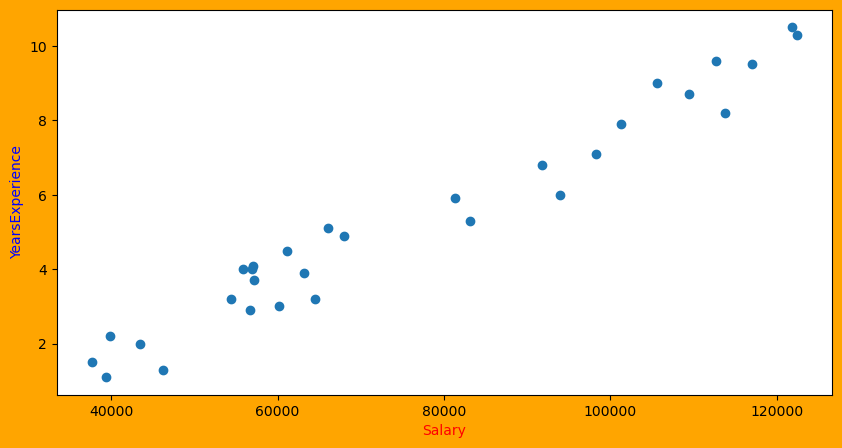

In [38]:
plt.figure(figsize=(10,5),facecolor="orange")
plt.scatter(SD.Salary,SD.YearsExperience)
plt.xlabel("Salary",color="red")
plt.ylabel("YearsExperience",color="blue")
plt.show()

In [39]:
first_model=smf.ols("Salary~YearsExperience",data=SD).fit()

In [40]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        16:43:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [42]:
first_model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

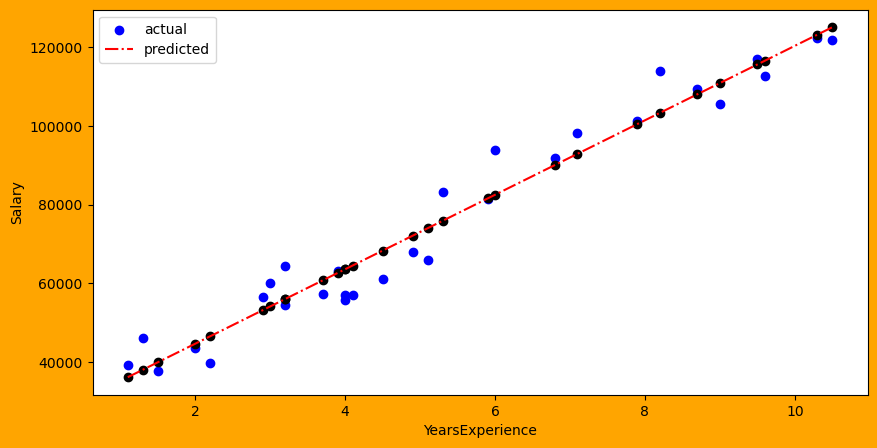

In [43]:
plt.figure(figsize=(10,5),facecolor='Orange')
plt.scatter(SD.YearsExperience,SD.Salary,color='blue',label="actual");
plt.plot(SD.YearsExperience,first_model.predict(),label="predicted",color='red',linestyle="-.");
plt.scatter(SD.YearsExperience,first_model.predict(),color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()

# Taking log Transformation

In [44]:
second_model=smf.ols('Salary~np.log(YearsExperience)',data=SD).fit()

In [45]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        16:43:17   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
second_model.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [59]:
second_model.predict()

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

# Exponential Transformation

In [46]:
third_model=smf.ols('np.log(Salary)~YearsExperience',data=SD).fit()

In [47]:
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        16:43:18   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
third_model.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [63]:
third_model.predict()

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])

# Taking Sqrt Transformation

In [77]:
SD['YearsExperience_sq']=SD.YearsExperience**2
fourth_model=smf.ols('Salary~YearsExperience+YearsExperience_sq',data=SD).fit()

In [78]:
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.59e-19
Time:                        18:15:04   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
fourth_model.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_sq       16.392566
dtype: float64

In [80]:
fourth_model.predict()

array([ 36419.97995933,  38279.7051688 ,  40140.74178358,  44799.07071874,
        46664.69725209,  53204.7174356 ,  54140.31743855,  56012.50099842,
        56012.50099842,  60698.69729633,  62575.47077478,  63514.34929099,
        63514.34929099,  64453.55565853,  68213.65964195,  71979.00924659,
        73863.65115687,  75749.60447246,  81415.33285105,  82360.76839379,
        89936.05538347,  92782.19755149, 100386.33545789, 103243.29671968,
       108011.45584918, 110876.2855428 , 115657.55872536, 116614.79691585,
       123324.64408643, 125244.69393997])

In [82]:
final_model=fourth_model

In [83]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.59e-19
Time:                        18:15:59   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
final_model.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_sq       16.392566
dtype: float64

In [85]:
final_model.predict()

array([ 36419.97995933,  38279.7051688 ,  40140.74178358,  44799.07071874,
        46664.69725209,  53204.7174356 ,  54140.31743855,  56012.50099842,
        56012.50099842,  60698.69729633,  62575.47077478,  63514.34929099,
        63514.34929099,  64453.55565853,  68213.65964195,  71979.00924659,
        73863.65115687,  75749.60447246,  81415.33285105,  82360.76839379,
        89936.05538347,  92782.19755149, 100386.33545789, 103243.29671968,
       108011.45584918, 110876.2855428 , 115657.55872536, 116614.79691585,
       123324.64408643, 125244.69393997])

# Predict for new data points

In [87]:
#Predict for 11 and 11.7 daily circulation
newdata=pd.Series([11,11.7])
newdata

0    11.0
1    11.7
dtype: float64

In [88]:
d_prdc=pd.DataFrame(newdata,columns=['YearsExperience'])
d_prdc

,YearsExperience
0,11.0
1,11.7


In [92]:
first_model.predict(d_prdc)

0    129741.785735
1    136356.759360
dtype: float64